# Content
1. [Load and chech Data](#1)
1. [Veriable Description](#2)
1. [Data cleaning](#3)
1. [Univariate Veriable Analysis](#4)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid') #plt.style.available

import warnings #ignore warning
warnings.filterwarnings("ignore")
from collections import Counter

In [2]:
df = pd.read_csv("../datasets/athlete_events.csv")
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

<a id="1"></a>
# Load And Check Data

In [3]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [5]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


<a id="2"></a>
# Veriable Description

1. ID: Unique number of each athlete
1. Name: Athlete name
1. Sex: Gender -> m(man) - f(woman)
1. Age
1. Height
1. Weight
1. Team
1. NOC: National olympic committee (3 letter code)
1. Games: Year and season
1. Year
1. Season: Winter, Summer
1. City: city where the event is held
1. Sport: General event branch
1. Event: Specific event name
1. Medal: Type of medal won -> Gold, Bronze, Silver, nan

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


## Types of variable
1. int64: ID, Year
1. float64: Age, Height, Weight
1. object(string): Name, Sex, Team, NOC, Games, Season, City, Sport, Event, Medal

<a id="3"></a>
# Data Cleaning
* Rename columns
* Removal and organization of useless data
* Detection of NaN(lost) data

## Rename columns 

In [7]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [8]:
df.rename(columns={'ID': 'id',
                  'Name' : 'name',
                  'Sex': 'gender',
                  'Age': 'age',
                  'Height': 'height',
                  'Weight': 'weight',
                  'Team': 'team',
                  'NOC': 'noc',
                  'Games': 'games',
                  'Year': 'year',
                  'Season': 'season',
                  'City': 'city',
                  'Sport': 'sport',
                  'Event': 'event',
                  'Medal': 'medal'},inplace=True)

In [9]:
df.head()

,id,name,gender,age,height,weight,team,noc,games,year,season,city,sport,event,medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Removal and organization of useless data

In [10]:
df = df.drop(["id","games"],axis=1) # axis = 1 -> columns
df.head(2)

,name,gender,age,height,weight,team,noc,year,season,city,sport,event,medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


## Detection of NaN and Fill Data with Average
* Filling in the missing data in the height and weight column is based on the event average.

In [11]:
unique_event = pd.unique(df.event)
print("Unique event number: ", len(unique_event))
#Example
unique_event[:10]

Unique event number:  765


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay"], dtype=object)

## Fill the missing value Height and weight columns

In [12]:
# loop each activity iteratively
# find average height and weight for the event
# equate the lost height and weight values to the activity averages
temp_df = df.copy() # Temporary data was created to avoid corrupting the actual data.
height_weight_list = ["height","weight"]
for e in unique_event:
    # event filter created
    event_filter = temp_df.event == e
    # filter data according to event
    data_filter = temp_df[event_filter]
    # average height and weight
    for s in height_weight_list:
        average = np.round(np.mean(data_filter[s]),2)
        if not np.isnan(average):
            data_filter[s] = data_filter[s].fillna(average)
        else:
            all_data_average = np.round(np.mean(df[s]),2)
            data_filter[s] = data_filter[s].fillna(all_data_average)
    temp_df[event_filter] = data_filter

In [13]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   name    271116 non-null  object 
 1   gender  271116 non-null  object 
 2   age     261642 non-null  float64
 3   height  271116 non-null  float64
 4   weight  271116 non-null  float64
 5   team    271116 non-null  object 
 6   noc     271116 non-null  object 
 7   year    271116 non-null  int64  
 8   season  271116 non-null  object 
 9   city    271116 non-null  object 
 10  sport   271116 non-null  object 
 11  event   271116 non-null  object 
 12  medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [14]:
df = temp_df.copy()

## Fill the missing value Age column

In [15]:
temp_df = df.copy()
average = np.round(np.mean(temp_df["age"]),1)
temp_df["age"] = temp_df["age"].fillna(average)
print("Average age: ",average)
temp_df.info() 

Average age:  25.6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   name    271116 non-null  object 
 1   gender  271116 non-null  object 
 2   age     271116 non-null  float64
 3   height  271116 non-null  float64
 4   weight  271116 non-null  float64
 5   team    271116 non-null  object 
 6   noc     271116 non-null  object 
 7   year    271116 non-null  int64  
 8   season  271116 non-null  object 
 9   city    271116 non-null  object 
 10  sport   271116 non-null  object 
 11  event   271116 non-null  object 
 12  medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [16]:
df = temp_df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   name    271116 non-null  object 
 1   gender  271116 non-null  object 
 2   age     271116 non-null  float64
 3   height  271116 non-null  float64
 4   weight  271116 non-null  float64
 5   team    271116 non-null  object 
 6   noc     271116 non-null  object 
 7   year    271116 non-null  int64  
 8   season  271116 non-null  object 
 9   city    271116 non-null  object 
 10  sport   271116 non-null  object 
 11  event   271116 non-null  object 
 12  medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [17]:
print("Number of athletes who did not receive medals: ",df["medal"].isnull().sum())
medal_filter = ~df["medal"].isnull()
df = df[medal_filter]

Number of athletes who did not receive medals:  231333


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    39783 non-null  object 
 1   gender  39783 non-null  object 
 2   age     39783 non-null  float64
 3   height  39783 non-null  float64
 4   weight  39783 non-null  float64
 5   team    39783 non-null  object 
 6   noc     39783 non-null  object 
 7   year    39783 non-null  int64  
 8   season  39783 non-null  object 
 9   city    39783 non-null  object 
 10  sport   39783 non-null  object 
 11  event   39783 non-null  object 
 12  medal   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


In [19]:
# Save clean data
#df.to_csv("../datasets/clean_athlete_events.csv",index=False)

<a id="4"></a>
# Univariate Veriable Analysis
* Categorical Veriables: 
    1. age
    1. height
    1. weight
    1. year
* Numeric Veriables: 
    1. name
    1. gender
    1. team
    1. noc
    1. season
    1. city
    1. sport
    1. event
    1. medal

## Numeric Veriables

In [20]:
def plotHistogram(veriable):
    """
        input = column name
        output = histogram plot
    """
    plt.figure()
    plt.hist(df[veriable],bins=85,color="orange")
    plt.xlabel(veriable.upper())
    plt.ylabel("Frequency")
    plt.title(f"Data Frequency - {veriable}")
    plt.show    

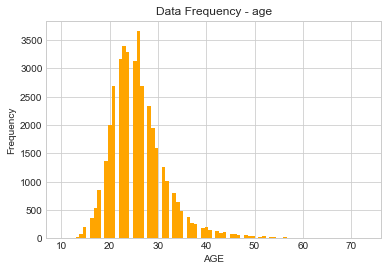

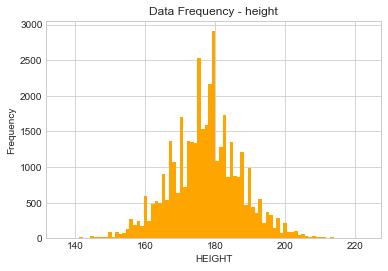

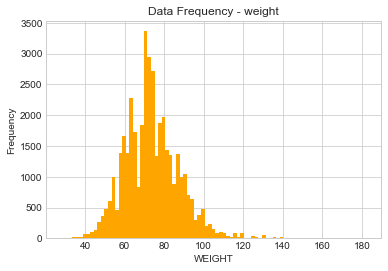

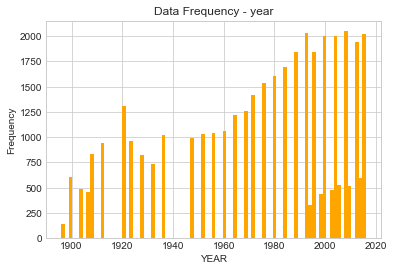

In [21]:
category = ['age','height','weight','year']
for c in category:
    plotHistogram(c)

In [22]:
#tatistical properties of numerical data
df.describe()

,age,height,weight,year
count,39783.000000,39783.000000,39783.000000,39783.000000
mean,25.919192,177.336690,73.738320,1973.943845
std,5.859527,10.170124,13.979041,33.822857
min,10.000000,136.000000,28.000000,1896.000000
25%,22.000000,170.000000,64.000000,1952.000000
50%,25.000000,177.480000,73.000000,1984.000000
75%,29.000000,184.000000,82.000000,2002.000000
max,73.000000,223.000000,182.000000,2016.000000


In [25]:
#box plot for age veriable
def plotBoxGraph(veriable):
    """
        input: Veriable/Column name
        output: Box graph
    """
    plt.boxplot(df[veriable])
    plt.title(f"Box plot for {veriable} veriable")
    plt.xlabel(veriable)
    plt.ylabel('Value')
    plt.show()

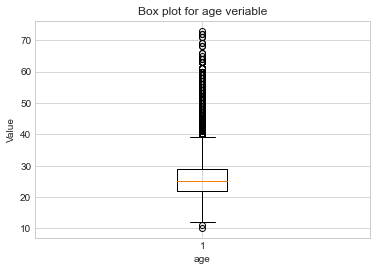

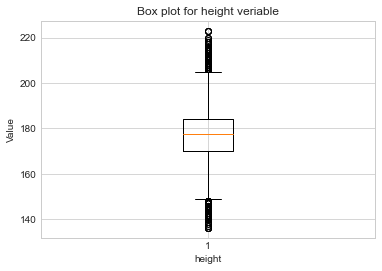

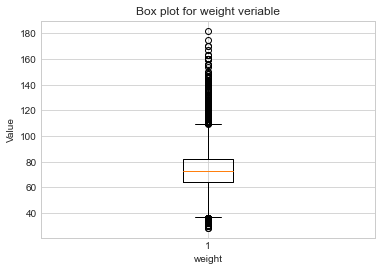

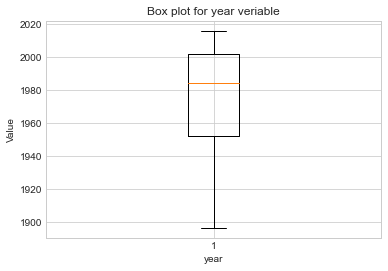

In [27]:
for c in category:
    plotBoxGraph(c)

## Categorical Veriables

In [32]:
def plotBar(veriable,n=5):
    """
        input: 
            veriable:Veriable/Column name
            n: unique value to display
        output: Box plot & value count
    """
    #get feature and count number of categorical veriable
    varValue = df[veriable].value_counts()
    varValue = varValue[:5]
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index,varValue,color="orange")
    plt.xticks(rotation=45)
    plt.ylabel('Frequency')
    plt.title(veriable)
    plt.show()
    
    print(f"{veriable}\n{varValue}")

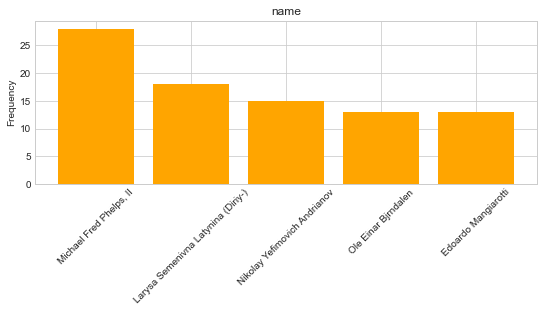

name
Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Ole Einar Bjrndalen                   13
Edoardo Mangiarotti                   13
Name: name, dtype: int64


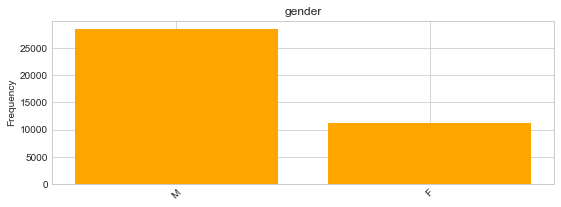

gender
M    28530
F    11253
Name: gender, dtype: int64


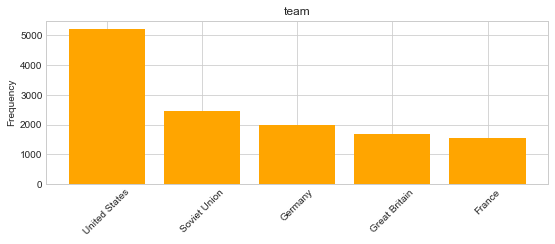

team
United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Name: team, dtype: int64


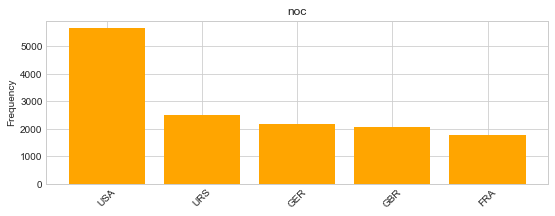

noc
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
Name: noc, dtype: int64


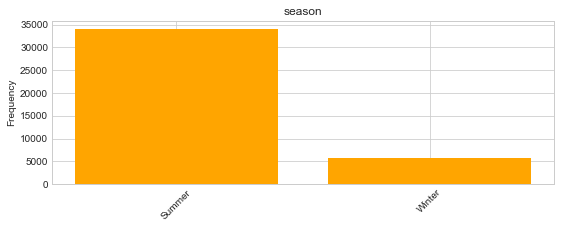

season
Summer    34088
Winter     5695
Name: season, dtype: int64


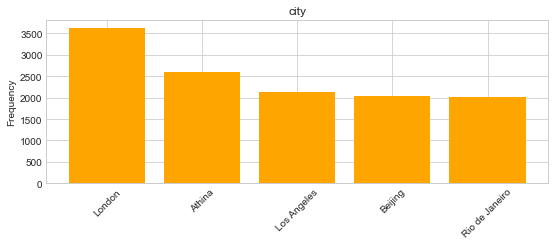

city
London            3624
Athina            2602
Los Angeles       2123
Beijing           2048
Rio de Janeiro    2023
Name: city, dtype: int64


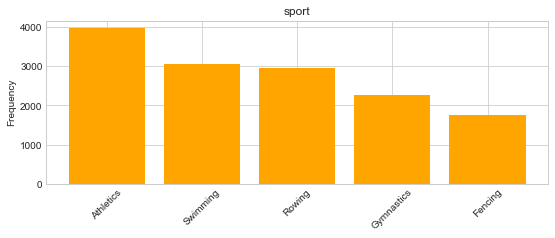

sport
Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Name: sport, dtype: int64


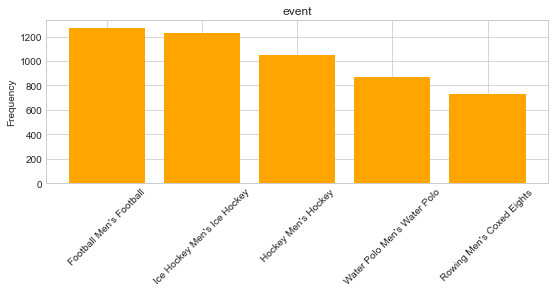

event
Football Men's Football        1269
Ice Hockey Men's Ice Hockey    1230
Hockey Men's Hockey            1050
Water Polo Men's Water Polo     866
Rowing Men's Coxed Eights       730
Name: event, dtype: int64


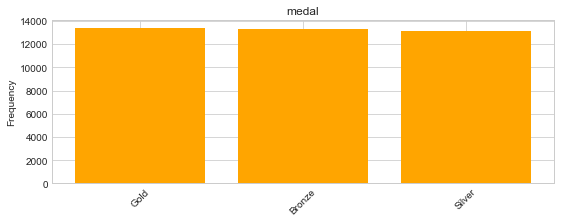

medal
Gold      13372
Bronze    13295
Silver    13116
Name: medal, dtype: int64


In [33]:
categorical = ['name','gender','team','noc','season','city','sport','event','medal']
for c in categorical:
    plotBar(c)